In [29]:
import re
from collections import Counter
import matplotlib.pyplot as plt

def limpiar_texto(texto):
	texto = texto.upper()
	return re.sub(r'[^A-ZÑ]', '', texto)

# Ejemplos de prueba
texto_original = limpiar_texto("HOLA MUNDO")
texto_largo = limpiar_texto("En un texto largo teoricamente es mucho mas probable el poder extraer o identificar patrones en una clave vigenere utilizando el analisis de frecuencia")

# Cifrado César
clave_cesar = 3

# Cifrado Afín
clave_a, clave_b = 5, 8

# Cifrado Vigenère
clave_vigenere = limpiar_texto("CLAVE")

In [30]:
ALFABETO = "ABCDEFGHIJKLMNÑOPQRSTUVWXYZ"
DISTRIBUCION_TEORICA = {
	"A": 12.53, "B": 1.42, "C": 4.68, "D": 5.86, "E": 13.68, "F": 0.69, "G": 1.01, "H": 0.70, "I": 6.25,
	"J": 0.44, "K": 0.02, "L": 4.97, "M": 3.15, "N": 6.71, "Ñ": 0.31, "O": 8.68, "P": 2.51, "Q": 0.88,
	"R": 6.87, "S": 7.98, "T": 4.63, "U": 3.93, "V": 0.90, "W": 0.01, "X": 0.22, "Y": 0.90, "Z": 0.52
}

In [31]:
def cifrado_cesar(texto, clave):
	return "".join(ALFABETO[(ALFABETO.index(c) + clave) % 27] if c in ALFABETO else c for c in texto)

def descifrado_cesar(texto_cifrado, clave):
	return "".join(ALFABETO[(ALFABETO.index(c) - clave) % 27] if c in ALFABETO else c for c in texto_cifrado)

def cifrado_afin(texto, a, b):
	return "".join(ALFABETO[(a * ALFABETO.index(c) + b) % 27] if c in ALFABETO else c for c in texto)

def descifrado_afin(texto_cifrado, a, b):
	a_inv = next(i for i in range(27) if (a * i) % 27 == 1)
	return "".join(ALFABETO[(a_inv * (ALFABETO.index(c) - b)) % 27] if c in ALFABETO else c for c in texto_cifrado)

def cifrado_vigenere(texto, clave):
	return "".join(ALFABETO[(ALFABETO.index(c) + ALFABETO.index(clave[i % len(clave)])) % 27] if c in ALFABETO else c for i, c in enumerate(texto))

def descifrado_vigenere(texto_cifrado, clave):
	return "".join(ALFABETO[(ALFABETO.index(c) - ALFABETO.index(clave[i % len(clave)])) % 27] if c in ALFABETO else c for i, c in enumerate(texto_cifrado))

def analisis_frecuencia(texto):
	contador = Counter(c for c in texto if c in ALFABETO)
	total = sum(contador.values())
	return {letra: (contador[letra] / total) * 100 for letra in ALFABETO if letra in contador}

def graficar_comparacion_frecuencias(titulo, frecuencia_encontrada):
	"""Genera una gráfica de barras comparando la distribución encontrada contra la distribución teórica."""
	letras = list(DISTRIBUCION_TEORICA.keys())
	valores_teoricos = [DISTRIBUCION_TEORICA[letra] for letra in letras]
	valores_encontrados = [frecuencia_encontrada.get(letra, 0) for letra in letras]
	
	x = range(len(letras))
	plt.figure(figsize=(12, 6))
	plt.bar(x, valores_teoricos, width=0.4, label='Distribución Teórica', align='center', alpha=0.7)
	plt.bar(x, valores_encontrados, width=0.4, label='Distribución Encontrada', align='edge', alpha=0.7)
	plt.xticks(x, letras)
	plt.xlabel("Letras")
	plt.ylabel("Frecuencia (%)")
	plt.title(titulo)
	plt.legend()
	plt.show()


In [32]:

cifrado_c = cifrado_cesar(texto_original, clave_cesar)
descifrado_c = descifrado_cesar(cifrado_c, clave_cesar)
print("César Cifrado:", cifrado_c)
print("César Descifrado:", descifrado_c)

cifrado_a = cifrado_afin(texto_original, clave_a, clave_b)
descifrado_a = descifrado_afin(cifrado_a, clave_a, clave_b)
print("Afín Cifrado:", cifrado_a)
print("Afín Descifrado:", descifrado_a)

cifrado_v = cifrado_vigenere(texto_original, clave_vigenere)
descifrado_v = descifrado_vigenere(cifrado_v, clave_vigenere)
print("Vigenère Cifrado:", cifrado_v)
print("Vigenère Descifrado:", descifrado_v)

César Cifrado: KRÑDOXPGR
César Descifrado: HOLAMUNDO
Afín Cifrado: PCJIÑFSWC
Afín Descifrado: HOLAMUNDO
Vigenère Cifrado: JZLVPWXDK
Vigenère Descifrado: HOLAMUNDO


Análisis de frecuencia: {'A': 10.15625, 'B': 1.5625, 'C': 4.6875, 'D': 3.125, 'E': 17.1875, 'F': 1.5625, 'G': 1.5625, 'H': 0.78125, 'I': 7.8125, 'L': 5.46875, 'M': 2.34375, 'N': 8.59375, 'O': 7.03125, 'P': 2.34375, 'R': 7.8125, 'S': 3.90625, 'T': 6.25, 'U': 3.90625, 'V': 1.5625, 'X': 1.5625, 'Z': 0.78125}


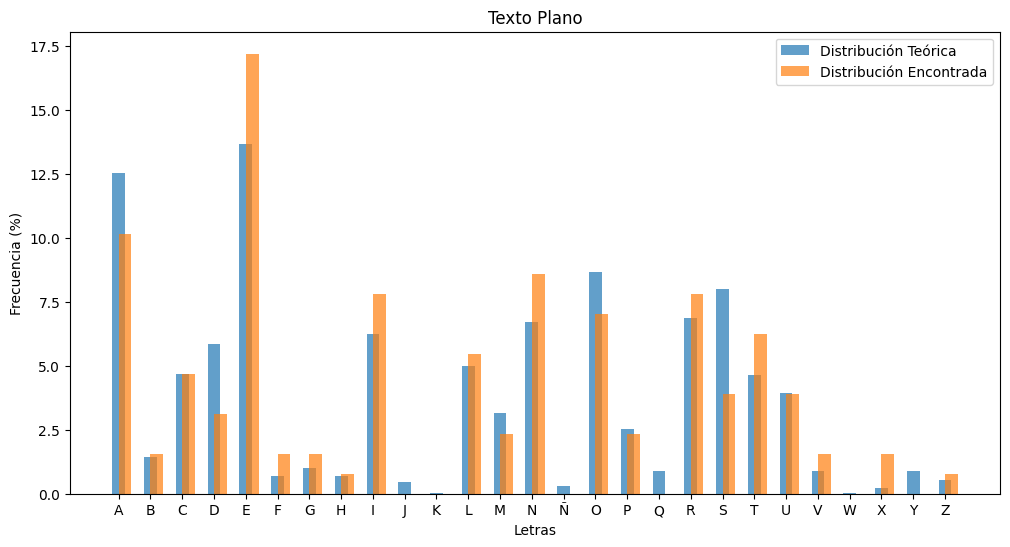

In [33]:
frecuencia = analisis_frecuencia(texto_largo)
print("Análisis de frecuencia:", frecuencia)
graficar_comparacion_frecuencias("Texto Plano", frecuencia)

Análisis de frecuencia: {'A': 4.6875, 'C': 6.25, 'D': 1.5625, 'E': 4.6875, 'F': 2.34375, 'G': 7.03125, 'H': 3.125, 'I': 6.25, 'K': 4.6875, 'L': 2.34375, 'M': 3.90625, 'N': 3.90625, 'Ñ': 1.5625, 'O': 11.71875, 'Q': 3.90625, 'R': 3.90625, 'S': 3.90625, 'T': 3.125, 'U': 3.125, 'V': 5.46875, 'W': 1.5625, 'X': 5.46875, 'Y': 1.5625, 'Z': 3.90625}


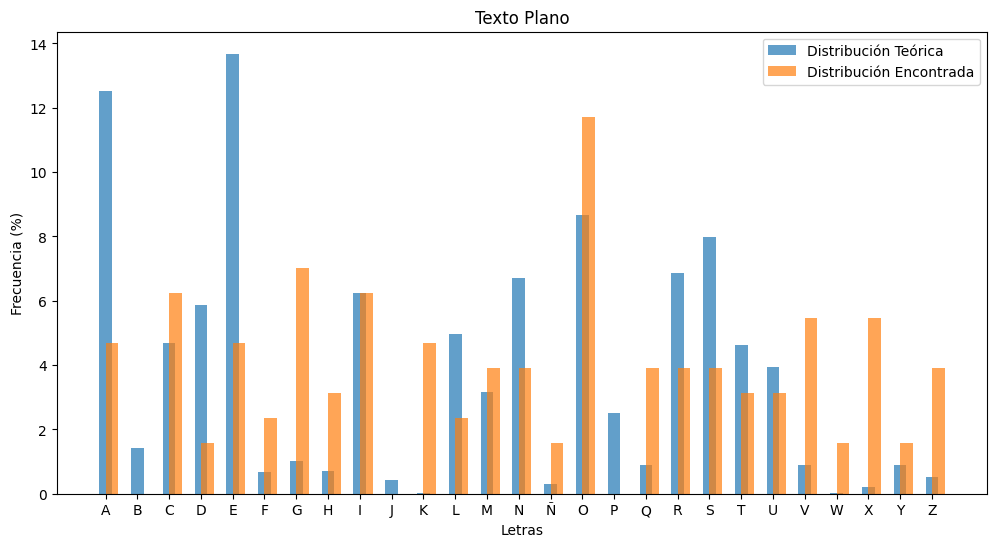

In [34]:
cifrado_v = cifrado_vigenere(texto_largo, clave_vigenere)
frecuencia = analisis_frecuencia(cifrado_v)
print("Análisis de frecuencia:", frecuencia)
graficar_comparacion_frecuencias("Texto Plano", frecuencia)